*******************
### IMPORTING REQUIRED LIBRARIES
******************

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [69]:
df = pd.read_csv('Heart Disease data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [70]:
df.shape

(1025, 14)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [72]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### DETECTING OUTLIERS

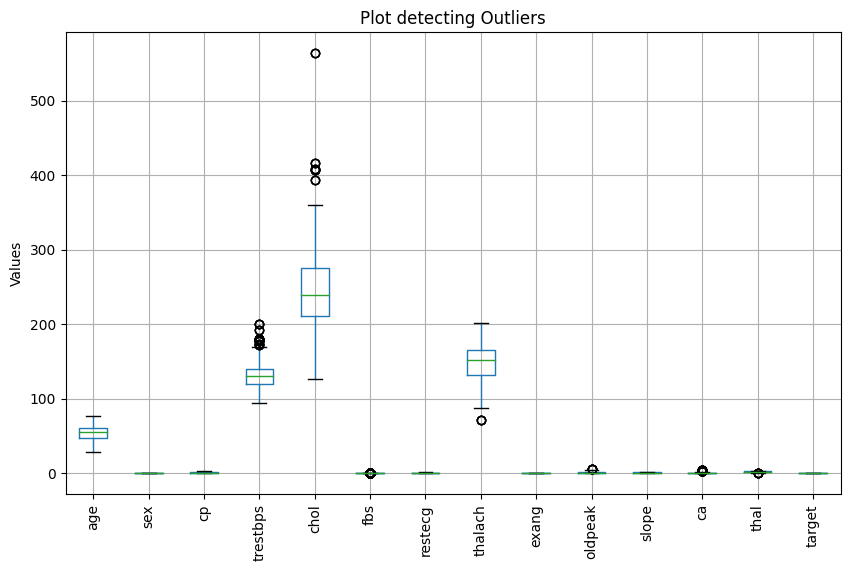

In [73]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title("Plot detecting Outliers")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#### REMOVING OUTLIERS

In [74]:
# Each z-score tells us how many standard deviations away an individual value is from the mean
z_scores = stats.zscore(df)
print(z_scores)
threshold = 3
outliers = (z_scores> threshold)|(z_scores< -threshold)
cleaned_data = df[outliers.any(axis=1)]
cleaned_data


           age       sex        cp  trestbps      chol       fbs   restecg  \
0    -0.268437  0.661504 -0.915755 -0.377636 -0.659332 -0.418878  0.891255   
1    -0.158157  0.661504 -0.915755  0.479107 -0.833861  2.387330 -1.004049   
2     1.716595  0.661504 -0.915755  0.764688 -1.396233 -0.418878  0.891255   
3     0.724079  0.661504 -0.915755  0.936037 -0.833861 -0.418878  0.891255   
4     0.834359 -1.511706 -0.915755  0.364875  0.930822  2.387330  0.891255   
...        ...       ...       ...       ...       ...       ...       ...   
1020  0.503520  0.661504  0.055931  0.479107 -0.484803 -0.418878  0.891255   
1021  0.613800  0.661504 -0.915755 -0.377636  0.232705 -0.418878 -1.004049   
1022 -0.819834  0.661504 -0.915755 -1.234378  0.562371 -0.418878 -1.004049   
1023 -0.488996 -1.511706 -0.915755 -1.234378  0.155137 -0.418878 -1.004049   
1024 -0.047877  0.661504 -0.915755 -0.663216 -1.124743 -0.418878  0.891255   

       thalach     exang   oldpeak     slope        ca      tha

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


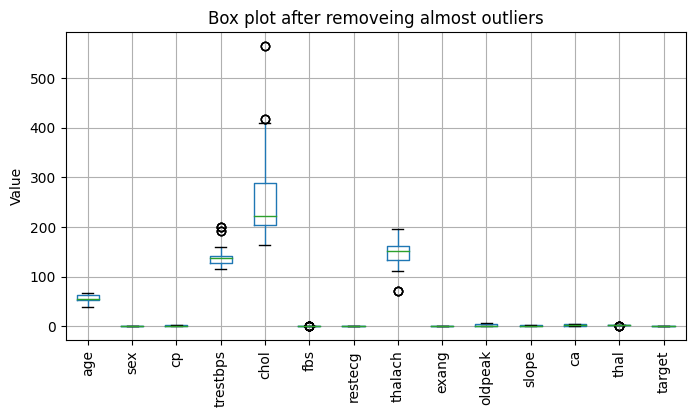

In [75]:
plt.figure(figsize=(8,4))
cleaned_data.boxplot()
plt.title("Box plot after removeing almost outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

********************
### VISUALIZING PATIENTS DEMOGRAPHICS 
**********************

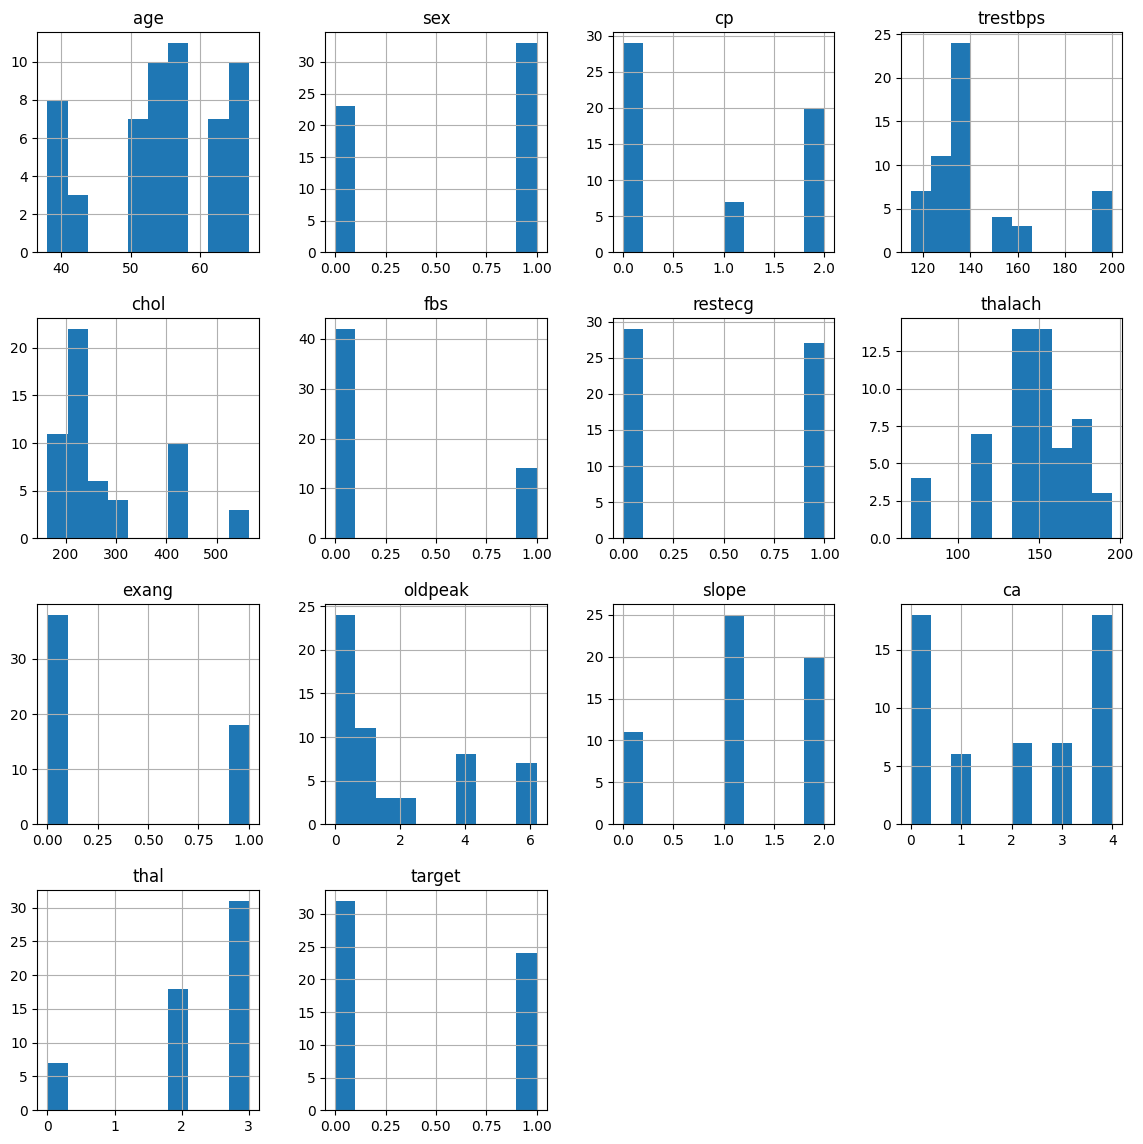

In [76]:
cleaned_data.hist(figsize=(14,14))
plt.show()

In [77]:
gender_count = df['sex'].value_counts()
print(gender_count)
chestpain_count= df['cp'].value_counts()
print(chestpain_count)
age_count= df['age'].value_counts()
print(age_count)

1    713
0    312
Name: sex, dtype: int64
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64


#### GRAPHS FOR EACH CATEGORY

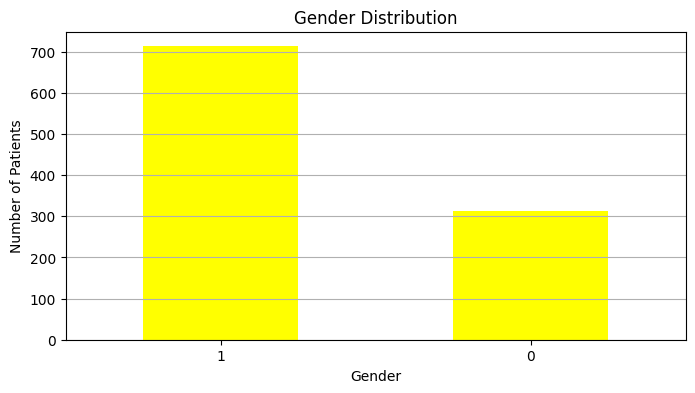

In [78]:
gender_count.plot(kind='bar',figsize=(8,4), color='yellow')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.xticks(rotation=0)

plt.show()

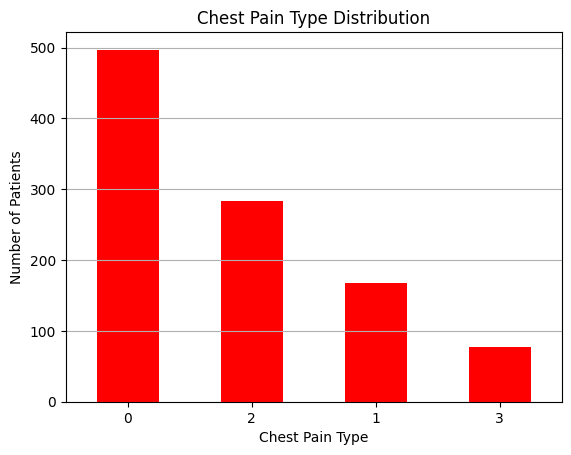

In [79]:
chestpain_count.plot(kind='bar', color='red')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.xticks(rotation=0)

plt.show()

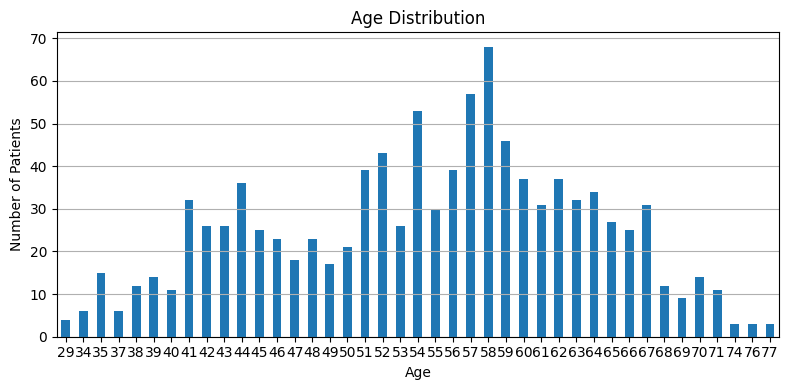

In [80]:
plt.figure(figsize=(8,4))

age_count = age_count.sort_index()

age_count.plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.xticks(rotation=0)

plt.tight_layout()  # To ensure labels fit within the figure
plt.show()

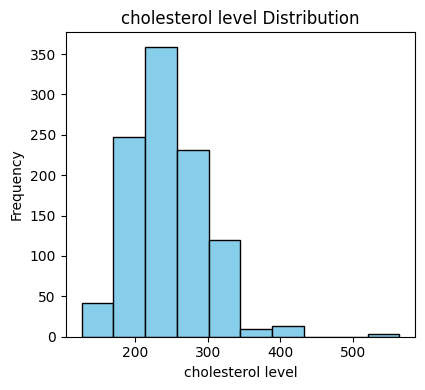

In [81]:

plt.figure(figsize=(8,4))

#histogram for cholesterol levels
plt.subplot(1, 2,2)
plt.hist(df['chol'], color="skyblue", edgecolor='black')
plt.title('cholesterol level Distribution')
plt.xlabel("cholesterol level")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

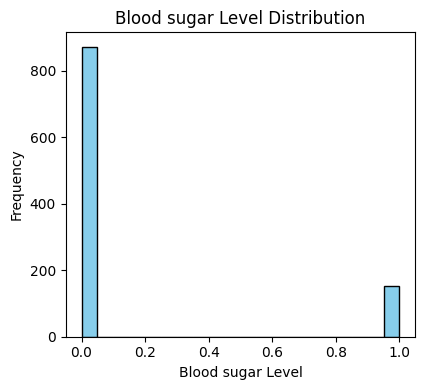

In [82]:
 
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 2)
plt.hist(df['fbs'], bins=20, color="skyblue", edgecolor='black')
plt.title('Blood sugar Level Distribution')
plt.xlabel("Blood sugar Level")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

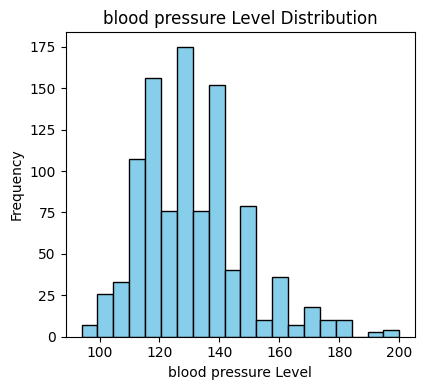

In [83]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 2)
plt.hist(df['trestbps'], bins=20, color="skyblue", edgecolor='black')
plt.title('blood pressure Level Distribution')
plt.xlabel("blood pressure Level")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### HEART DISEASE FREQUENCY ACCORDING TO SEX 


In [84]:

print(df.sex.value_counts())
#Compare target and sex column
pd.crosstab(df.target, df.sex)

1    713
0    312
Name: sex, dtype: int64


sex,0,1
target,,
0,86,413
1,226,300


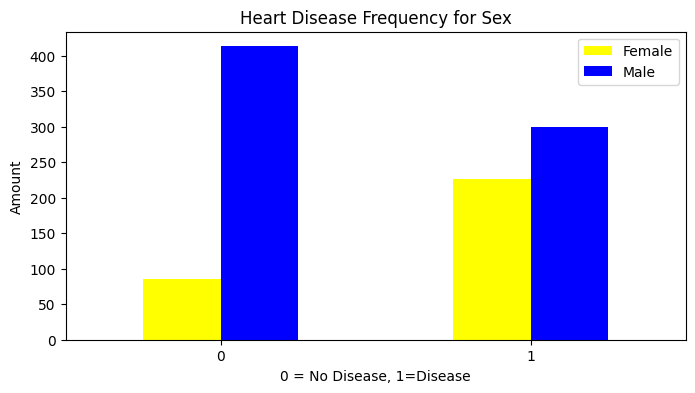

In [85]:

pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(8,4),color=["yellow","blue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

plt.show()

##### HEART DISEASE FREQUENCY ACCORDING TO AGE AND MAX HEART RATE

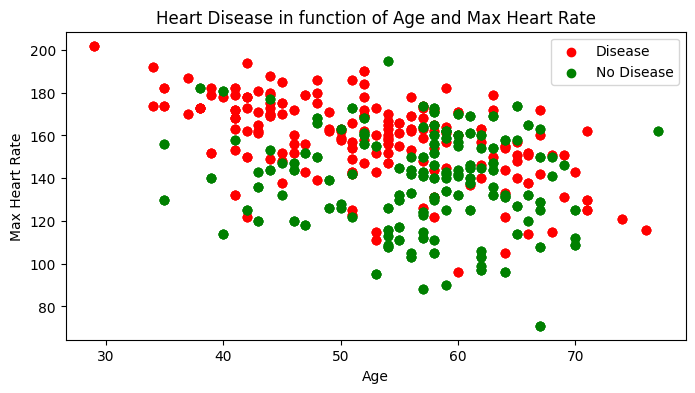

In [86]:
plt.figure(figsize=(8,4))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='red') 
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='green')

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

*****************
### MODELLING
****************

In [87]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [89]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### DIVIDING TRAINING DATASET AND TARGET VARIABLE

In [90]:
x= df.drop('target', axis=1)
y= df.target

In [91]:
# SPLIT INTO TRAIN AND TEST DATA
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

##### MODELS
3 different Machine Learning models
1. Logistic Regression
2. K-Nearest Neighbors Classifiers
3. Random Forest Classifiers

In [92]:
# MODELS
models = {'Logistic Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Random Forest' : RandomForestClassifier()}

def fit_data_and_score(models, x_train, x_test, y_train, y_test):
    # Random Seeding 
    np.random.seed(40)
    
    model_scores = {}
    
    for name,model in models.items():
        model.fit(x_train, y_train)
        model_scores[name]=model.score(x_test, y_test)
        
    return model_scores


In [93]:
model_scores = fit_data_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\piyus\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

##### MODEL COMPARISON

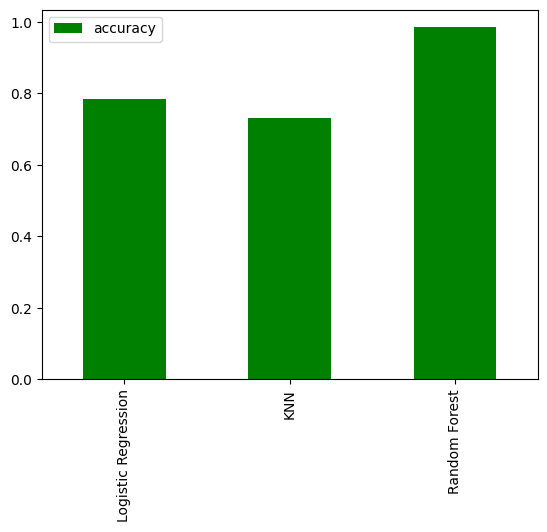

In [94]:
model_comparison = pd.DataFrame(model_scores, index=['accuracy'])
model_comparison.T.plot(kind='bar', color= 'green')
# T is used to transpose the DataFrame model_comparison before plotting it. Transposing a DataFrame means swapping its rows and columns. 
plt.show()

For base Model, Random Forest Works better than KNN and Logistic Regression.

Lets find following:
- Precision
- Recall
- F1 Score
- Accuracy

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [96]:
# FUNCTION TO EVALUSTE AND PRINT MATRICS
def evaluate_model(models, x_train, x_test, y_train, y_test):
    y_pred = models.predict(x_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy


In [97]:
# EVALUATING EACH MODEL 
results= {}
for name, model in models.items():
    precision, recall, f1, accuracy = evaluate_model(model, x_train, x_test, y_train, y_test)
    results[name] = {
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy
    }
results

{'Logistic Regression': {'Precision': 0.7945198740653285,
  'Recall': 0.7849324195697696,
  'F1 Score': 0.7835061443932412,
  'Accuracy': 0.7853658536585366},
 'KNN': {'Precision': 0.7317212490479816,
  'Recall': 0.7316771368741671,
  'F1 Score': 0.7316817781585399,
  'Accuracy': 0.7317073170731707},
 'Random Forest': {'Precision': 0.9857142857142858,
  'Recall': 0.9854368932038835,
  'F1 Score': 0.9853644606268295,
  'Accuracy': 0.9853658536585366}}

In [98]:
for name, metrics in results.items():
    print(f"Model    : {name}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall   : {metrics['Recall']}")
    print(f"F1 Score : {metrics['F1 Score']}")
    print(f"Accuracy : {metrics['Accuracy']}")
    print("-" * 30)


Model    : Logistic Regression
Precision: 0.7945198740653285
Recall   : 0.7849324195697696
F1 Score : 0.7835061443932412
Accuracy : 0.7853658536585366
------------------------------
Model    : KNN
Precision: 0.7317212490479816
Recall   : 0.7316771368741671
F1 Score : 0.7316817781585399
Accuracy : 0.7317073170731707
------------------------------
Model    : Random Forest
Precision: 0.9857142857142858
Recall   : 0.9854368932038835
F1 Score : 0.9853644606268295
Accuracy : 0.9853658536585366
------------------------------


##### VISUALIZING THE RESULTS

In [99]:
metrics_names = ["Precision", "Recall", "F1 Score", "Accuracy"]
models_names = list(results.keys())
print(models_names)
print(metrics_names)

['Logistic Regression', 'KNN', 'Random Forest']
['Precision', 'Recall', 'F1 Score', 'Accuracy']


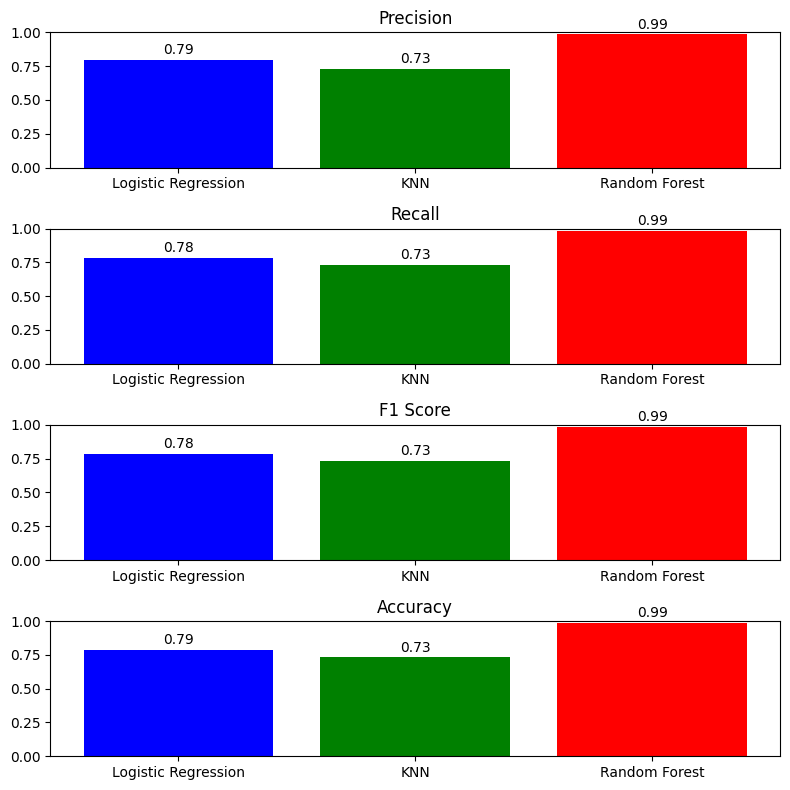

In [108]:
fig, axes = plt.subplots(nrows=len(metrics_names), ncols=1, figsize=(8, 8))
for i, metric_name in enumerate(metrics_names):
    values = [results[model][metric_name] for model in models_names]
    axes[i].bar(models_names, values, color=['blue','green', 'red'])
    axes[i].set_title(metric_name)
    axes[i].set_ylim(0, 1)
    for j, val in enumerate(values):
        axes[i].text(j, val + 0.02, f"{val:.2f}", ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()